# TFG - Documento bueno

In [1]:
#!python -m spacy download es_core_news_sm 
#!pip install --upgrade numexpr
#!pip uninstall scipy
#!pip install --upgrade --user pip setuptools wheel 
#!pip install --upgrade --user scipy
#!python -m spacy download en_core_web_md
#!python3 -m venv new_env
#!source new_env\Scripts\activate  # On Windows use ``
#!pip install numpy pandas seaborn matplotlib pyLDAvis

In [1]:
import spacy
nlp = spacy.load('en_core_web_md')
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download es_core_news_sm
    !pip install pyldavis --upgrade
    !pip install gensim
    !pip install nltk
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install vaderSentiment
    !pip install datatable
    !pip install unidecode 
    !pip install --upgrade pip
    !pip install -U numpy #Volver a reiniciar el entorno de ejecución
!pip install pyldavis --upgrade

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
import pandas as pd
from collections import Counter
from random import seed
from unidecode import unidecode

In [3]:
#Visualizations
import plotly.express as px
import matplotlib.pyplot as plt 
import matplotlib.path as mpath
import pyLDAvis
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import seaborn as sns

C:\Users\Alejandra Bandeira\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Alejandra Bandeira\AppData\Roaming\Python\Python38\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Alejandra Bandeira\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:13: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  version = LooseVersion(pd.__version__)
C:\Users\Alejandra Bandeira\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:14: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  pandas_lt_25_0 = version < LooseVersion('0.25.0')
C:\Users\Alejandra Bandeira\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:15: Depr

In [4]:
import emoji
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer #unigramas, bigramas, trigramas
from wordcloud import WordCloud, STOPWORDS #wordcloud

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from unidecode import unidecode
import spacy
from unidecode import unidecode

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Alejandra
[nltk_data]     Bandeira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Alejandra
[nltk_data]     Bandeira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Alejandra
[nltk_data]     Bandeira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#Analisis de sentimientos - Librerias especificas
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import emoji

[nltk_data] Downloading package vader_lexicon to C:\Users\Alejandra
[nltk_data]     Bandeira\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
#Modelado de topicos
#!pip install gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import gensim

##### Cargar datos

In [12]:
#leer CSV
df_analisis = pd.read_csv(r'C:\Users\Alejandra Bandeira\Downloads\data_airbnb.csv',sep=';')

## 1.Pre-procesamiento: 
#### Quitar URLS, menciones, hashtags, stopwords, signos de puntuación, tokenizar y lematizar

In [9]:
#Stopwords
stop_words=stopwords.words('english')

In [10]:
#Añadir otras stopwords
stop_words.extend(['airbnb','also','still','may','rt','would','u','could','even','another','like','okay','en','twitter','many','na','us','bnb','amp','th'])
stop_words.extend( [
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 
    'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 
    'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 
    'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 
    'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 
    'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 
    "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', 
    "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 
    'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 
    'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 
    'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', 
    "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 
    'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 
    'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 
    'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
    'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 
    'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 
    'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 
    'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves','U'])


In [ ]:
#Función para pre procesamiento del corpus
#Quitar URLS, menciones, hashtags, numeros, stopwords, signos de puntuacion, Tokenizacion, conversion a minusculas

Cargar el lemmatizer y las stopwords de NLTK
lemmatizer = WordNetLemmatizer()
def preprocess_lemmatize_clean(text):
    if not isinstance(text, str):
        raise ValueError("Se esperaba una cadena de texto (string) como entrada.")   
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return tokens

In [ ]:
df_analisis['Tweet'] = df_analisis['Tweet'].astype(str)

In [ ]:
#Creo una nueva columna para los resultados de la funcion de limpieza
df_analisis['lemmas'] = df_analisis['Tweet'].apply(preprocess_lemmatize_clean)

In [ ]:
#Función para lematizacion
def lemma_words(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct and token.pos_ != 'PRON':
            lemmas.append(token.lemma_)
    lemmas = [i for i in lemmas if len(i) > 1]
    lemmas = ' '.join(lemmas)  # Unir los lemas en una cadena antes de decodificar
    lemmas = unidecode(lemmas)  # Aquí se corrige el llamado a unidecode
    lemmas = re.sub(r"\bgoing\b", "go", lemmas) 
    lemmas = re.sub(r"\blooking\b", "look", lemmas) 
    lemmas = re.sub(r"\brentals\b", "rental", lemmas) 
    lemmas = re.sub(r"\bfounded\b", "found", lemmas) 
    lemmas = re.sub(r"\bbecoming\b", "become", lemmas) 
    lemmas = re.sub(r"\bbased\b", "base", lemmas)     
    lemmas = re.sub(r"\bexperiences\b", "experience", lemmas) 
    lemmas = re.sub(r"\bguests\b", "guest", lemmas) 
    lemmas = re.sub(r"\bproperties\b", "propertie", lemmas) 
    lemmas = re.sub(r"\bhotels\b", "hotel", lemmas) 
    lemmas = re.sub(r"\bbooking\b", "book", lemmas) 
    lemmas = re.sub(r"\bhousing\b", "book", lemmas) 
    lemmas = re.sub(r"\blisting\b", "list", lemmas) 
    lemmas = re.sub(r"\bamazing\b", "amaze", lemmas) 
    lemmas = re.sub(r"\bprivate\b", "private", lemmas) 
    lemmas = lemmas.split()
    lemmas = [word for word in lemmas if word not in stop_words]
    lemmas = ' '.join(lemmas)
    return lemmas


In [ ]:
#confirmo que lemmas es tipo cadena
df_analisis['lemmas'] = df_analisis['lemmas'].fillna('').astype('string')

In [ ]:
# Aplicar la función de lematizacion a la columna de datos ya preprocesada
df_analisis['lemmas2'] = df_analisis['lemmas'].apply(lemma_words)

In [ ]:
df_analisis.dropna(inplace=True)
df_analisis = df_analisis.drop_duplicates(subset='lemmas', keep="first")

In [ ]:
# Guardar a un archivo CSV
df_analisis.to_csv("C:/Users/Alejandra Bandeira/Downloads/lematizacion13.csv", index=False)

#### Word Cloud

In [16]:
df_analisis = pd.read_csv(r'C:\Users\Alejandra Bandeira\Downloads\lematizacion13.csv', delimiter=',')

In [17]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.show()

In [18]:
df_analisis['lemmas2'] = df_analisis['lemmas2'].fillna('').astype('string')

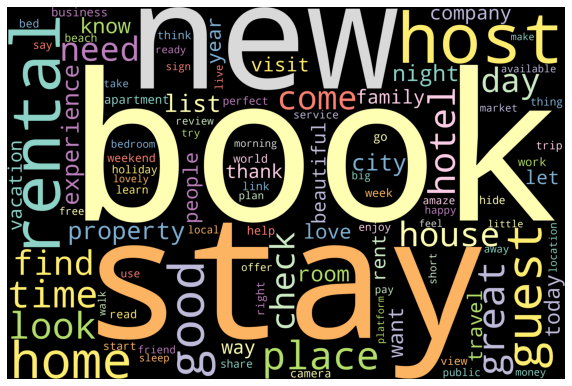

In [19]:
#Pintamos el wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=100, background_color='black', colormap='Set3', collocations=False, stopwords = STOPWORDS).generate(' '.join(df_analisis['lemmas2']))
plot_cloud(wordcloud) 

## 2. Análisis N-gramas

In [20]:
dft= df_analisis['lemmas2']
dft = [x for x in dft if str(x) != 'nan']

### Unigramas

book 128.50305683989396
stay 124.18140772394437
host 96.74218674190611
rental 88.26576612255508
new 86.38284043749475
guest 85.00796715189783
good 83.99882315461804
home 81.86493548291116
place 74.39389522668733
great 74.21093166735261
find 73.51440185608182
time 71.69296261807594
look 71.11892942337235
check 70.39232348066282
day 69.13430608294905
need 67.7687759520586
house 67.44729960351323
list 67.12636251464575
come 66.55206987011327
hotel 64.57981944530947
property 63.48093100184302
experience 61.40578969488237
night 58.843692780567046
city 54.53225846995175
know 53.67750245597714
room 53.288640115095156
love 52.66338521998031
want 52.18024393864959
today 51.14135641052592
beautiful 48.147688721898774


Text(0.5, 1.0, 'Unigramas más relevantes del corpus')

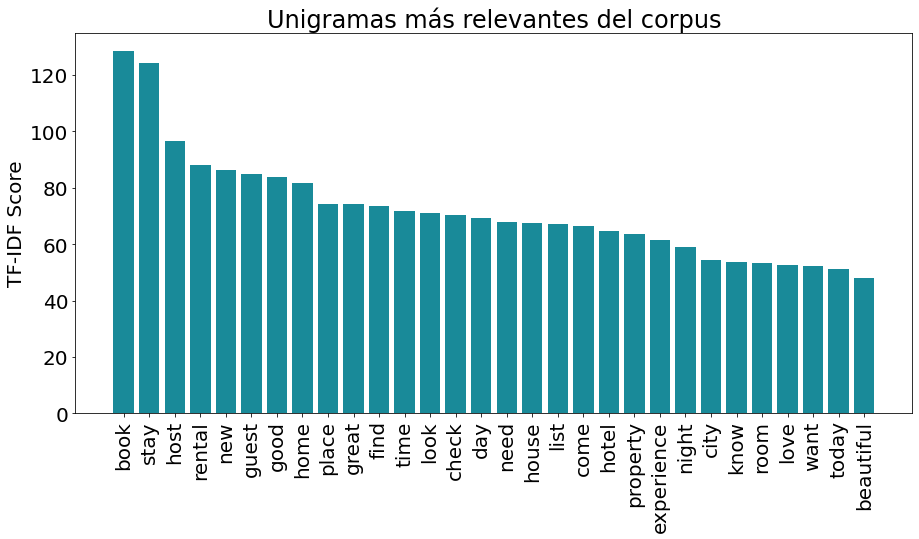

In [21]:
#Se calculan el Valor de TF-IDF de los unigramas
tfIdfVectorizer=TfidfVectorizer(use_idf=True, ngram_range=(1,1))
tfIdf = tfIdfVectorizer.fit_transform(dft)
names=tfIdfVectorizer.get_feature_names_out()
freqs = tfIdf.sum(axis=0).A1
result= dict(zip(names, freqs))
#print(result)

from operator import itemgetter
i = 0
results_sorted=sorted(result.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)

df_results=pd.DataFrame.from_dict(results_sorted).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results[0],df_results[1],color='#198A99')
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Unigramas más relevantes del corpus')

### Bigramas

hide camera 27.998562050471275
vacation rental 20.004191924499345
book stay 19.460242651119422
find hide 18.293564084866595
place stay 16.916455039235792
web client 15.587040870348826
short term 12.652092280539607
plan public 11.969346880377703
found august 11.64592771291541
time row 11.464729284106584
family find 11.411516127237185
link bio 10.616354213219607
experience ambassador 10.0377894616992
freelance experience 10.0377894616992
real estate 9.926138403483744
come stay 9.803794076702978
camera livestreaming 9.459449231383086
west bank 9.199772106007746
click link 8.617199456903423
great host 8.576711895131313
san francisco 8.431272071799423
announce plan 7.955059030452394
visit learn 7.877877329919107
host right 7.797127712100171
term rental 7.745500363354637
good morning 7.515119788629938
spend night 7.447079996883418
united state 7.174224869222984
property need 7.080273802240666
august base 7.0027197435254305


Text(0.5, 1.0, 'Bigramas más relevantes del corpus')

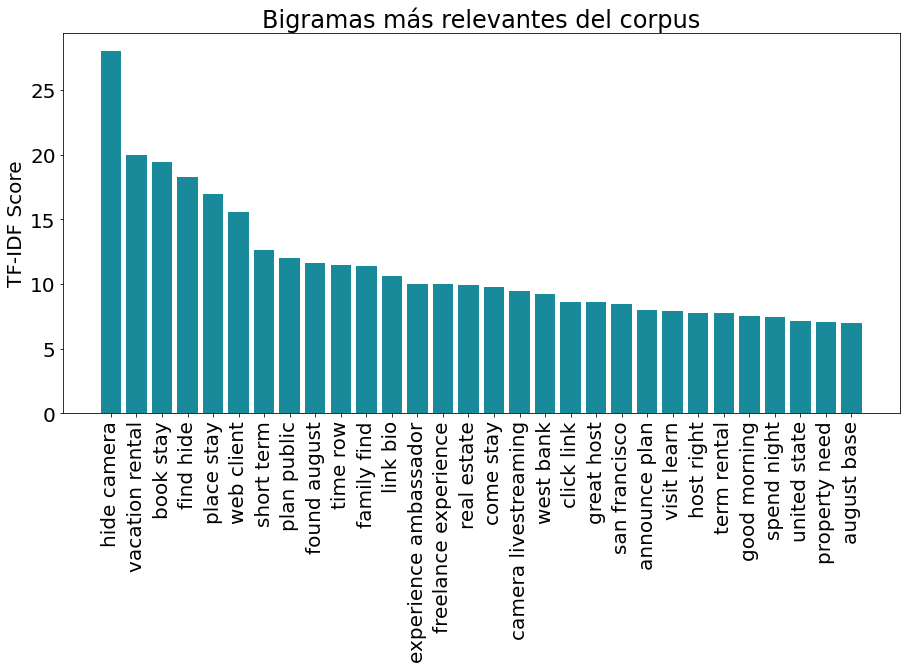

In [22]:
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)
    
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1],color='#198A99')
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del corpus')


### Trigramas

find hide camera 14.997671202467798
freelance experience ambassador 10.00134004587173
family find hide 8.198084146969075
hide camera livestreaming 8.047485519634048
short term rental 7.848326384097824
hero wear cape 7.447210502983226
found august base 7.0112858871648
investment property need 6.690032756932391
learn profit investment 6.690032756932391
profit investment property 6.690032756932391
visit learn profit 6.690032756932391
announce plan public 6.126239228699521
host right thing 6.058308794057394
united state found 5.356177958160214
francisco united state 5.301039915951615
san francisco united 5.301039915951615
superhost time row 5.056396397792231
dive great host 4.313382569083368
look place stay 4.196360858559127
american consumer spend 3.907385607795265
great host right 3.8862292876433067
truth great host 3.8862292876433067
camera livestreaming ireland 3.6536589839759617
discover hide camera 3.627836738258464
illegal israeli settlement 3.4083280791079775
need place stay 3.4040

Text(0.5, 1.0, 'Trigramas más relevantes del corpus')

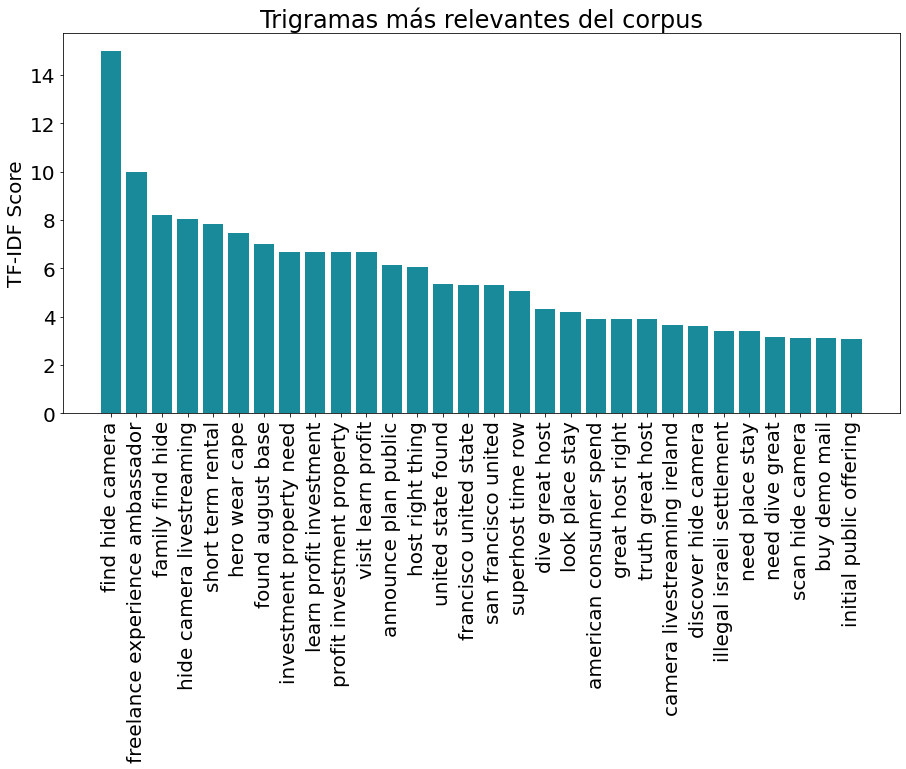

In [23]:
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)
    
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1],color='#198A99')
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del corpus')

## 3. Modelado de tópicos

In [31]:
df_analisis = pd.read_csv(r'C:\Users\Alejandra Bandeira\Downloads\lematizacion13.csv', delimiter=',')

In [32]:
#Funcion para tokenizar
def tokenize(text):
    text = str(text)
    tokens = text.split() 
    return tokens

In [33]:
df_analisis['tokens'] = df_analisis['lemmas2'].apply(tokenize)

In [34]:
seed(24) #semilla reproducibilidad
#Diccionario a partir de los tokens encontrados
id2word = Dictionary(df_analisis['tokens'])
id2word.filter_extremes(no_below=2, no_above=.95)
#Se crea el objeto del corpus
corpus = [id2word.doc2bow(d) for d in df_analisis['tokens']]

In [ ]:
#Funcion para encontrar el valor optimo de k
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [ ]:
#Se aplica la función definida en el paso anterior
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df_analisis['tokens'],
                                                        start=2, limit=15, step=1) #Establecemos el rango de tópicos


In [ ]:
#Se crea un csv con los valores coherencia del rango de tópicos establecido en el paso anterior
coherence_values_topic_df = pd.DataFrame(coherence_values_topic) 

In [ ]:
coherence_values_topic_df.to_csv("C:/Users/Alejandra Bandeira/Downloads/coherenc4.csv", index=False)

In [35]:
coherence_values_topic_df = pd.read_csv(r'C:\Users\Alejandra Bandeira\Downloads\coherenc4.csv', delimiter=',')

In [36]:
#Se crea una lista con los valores de las columnas indicados
coherence_values_topic_df=coherence_values_topic_df.iloc[:, 0].tolist()

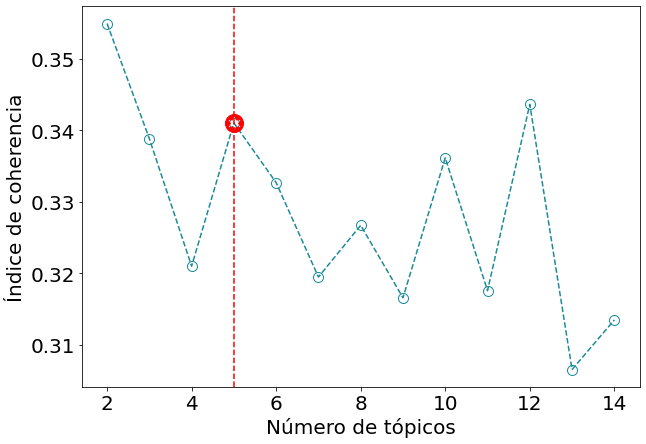

In [37]:
#Ploteamos para buscar K optimo
plt.figure(figsize=(10,7))
estrella = mpath.Path.unit_regular_star(6)  
circulo = mpath.Path.unit_circle()
verts = np.concatenate([circulo.vertices, estrella.vertices[::-1, ...] *0.9])
codes = np.concatenate([circulo.codes, estrella.codes])
cut_star = mpath.Path(verts, codes)
plt.plot(range(2, 15), coherence_values_topic_df, '#198A99', marker="o", markersize=10, fillstyle='none', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')
plt.plot(5, 0.341, 'r', marker=cut_star, markersize=18)
plt.xlabel('Número de tópicos')
plt.ylabel('Índice de coherencia')
plt.show()

In [ ]:
#Se genera el modelo LDA con el número de k elegido, en este caso k=5
k=5
model_k5 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        num_topics=k,
                                        passes=5)
                                        
#Se procede a guardar y cargar todos los resultados obtenidos del modelo
model_k5.save("model_5_topics.model")

In [38]:
model_k5_load=LdaMulticore.load("model_5_topics.model")

In [39]:
coherence_model_k5 = CoherenceModel(model=model_k5_load, texts=df_analisis['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_model_k5 = coherence_model_k5.get_coherence()
print('\nCoherence Score: ', coherence_model_k5)


Coherence Score:  0.31114144347437167


In [40]:
#Se observan las 10 palaras más utilizadas en cada tópico
print(model_k5_load.print_topics())
doc_lda = model_k5_load[corpus]
#Se filtra por palabras
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k5_load.print_topics()]
#Se crean los tópicos
topics = [' '.join(t[0:10]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.022*"stay" + 0.012*"book" + 0.010*"place" + 0.009*"come" + 0.009*"day" + 0.009*"night" + 0.007*"look" + 0.007*"good" + 0.007*"need" + 0.006*"great"'), (1, '0.011*"rental" + 0.010*"list" + 0.009*"book" + 0.008*"host" + 0.008*"hotel" + 0.008*"property" + 0.007*"let" + 0.006*"stay" + 0.006*"new" + 0.006*"good"'), (2, '0.012*"new" + 0.011*"guest" + 0.011*"stay" + 0.010*"book" + 0.009*"check" + 0.009*"room" + 0.009*"know" + 0.008*"home" + 0.008*"beautiful" + 0.007*"house"'), (3, '0.014*"host" + 0.009*"great" + 0.009*"book" + 0.008*"time" + 0.008*"experience" + 0.007*"today" + 0.006*"home" + 0.006*"day" + 0.006*"good" + 0.005*"new"'), (4, '0.012*"book" + 0.008*"learn" + 0.007*"good" + 0.007*"rental" + 0.007*"hotel" + 0.007*"company" + 0.007*"property" + 0.007*"home" + 0.007*"guest" + 0.007*"experience"')]
------ Topic 0 ------
stay book place come day night look good need great

------ Topic 1 ------
rental list book host hotel property let stay new good

------ Topic 2 ------
new gu

In [ ]:
#Pintamos la distancia intertópica con pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
gensimvis.prepare(model_k5_load, corpus, id2word)

In [41]:
#Imprimimos los tópicos y palabras más relevantes asociadas a cada uno
model_k5_load.print_topics()

[(0,
  '0.022*"stay" + 0.012*"book" + 0.010*"place" + 0.009*"come" + 0.009*"day" + 0.009*"night" + 0.007*"look" + 0.007*"good" + 0.007*"need" + 0.006*"great"'),
 (1,
  '0.011*"rental" + 0.010*"list" + 0.009*"book" + 0.008*"host" + 0.008*"hotel" + 0.008*"property" + 0.007*"let" + 0.006*"stay" + 0.006*"new" + 0.006*"good"'),
 (2,
  '0.012*"new" + 0.011*"guest" + 0.011*"stay" + 0.010*"book" + 0.009*"check" + 0.009*"room" + 0.009*"know" + 0.008*"home" + 0.008*"beautiful" + 0.007*"house"'),
 (3,
  '0.014*"host" + 0.009*"great" + 0.009*"book" + 0.008*"time" + 0.008*"experience" + 0.007*"today" + 0.006*"home" + 0.006*"day" + 0.006*"good" + 0.005*"new"'),
 (4,
  '0.012*"book" + 0.008*"learn" + 0.007*"good" + 0.007*"rental" + 0.007*"hotel" + 0.007*"company" + 0.007*"property" + 0.007*"home" + 0.007*"guest" + 0.007*"experience"')]

In [42]:
#Se añade una columna de LDA features al modelo cargado
def document_to_lda_features(model_k5_load,document):
    topic_importance=np.array(model_k5_load.get_document_topics(document, minimum_probability=0))
    return topic_importance[:,1]

In [43]:
df_analisis['lda_features']=list(map(lambda doc: document_to_lda_features(model_k5_load,doc), corpus))

In [45]:
#Se tokeniza los datos
def topic_important(item_score):
    score=np.argmax(item_score, axis=0)
    return score

In [46]:
#Se aplica la tokenización
df_analisis['topic_dominant'] = df_analisis['lda_features'].apply(topic_important)

In [ ]:
#Se genera un csv con los resultados
df_analisis.to_csv('C:/Users/Alejandra Bandeira/Downloads/topic_model_results2.csv', index=False)

In [47]:
#Se saca el número de tweets por tópico
df_analisis['topic_dominant'].value_counts()

topic_dominant
2    1795
1    1657
0    1430
4    1236
3    1167
Name: count, dtype: int64

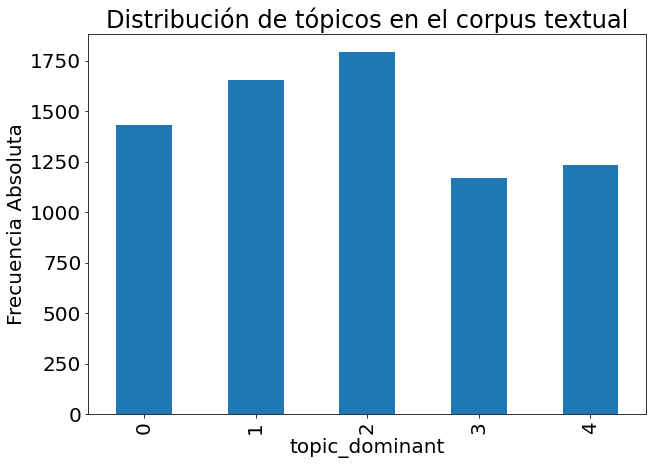

In [48]:
#Grafica nº de tweets por topico
plt.figure(figsize=(10,7))
ax=df_analisis["topic_dominant"].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

#### Bigramas por topico

In [ ]:
#Tópico 1
topic_1 = df_analisis[df_analisis['topic_dominant']==0] 
dft=topic_1['lemmas2']
dft= [x for x in dft if str(x) != 'nan']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))
from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes en el tópico 1')

In [ ]:
#Tópico 2
topic_2 = df_analisis[df_analisis['topic_dominant']==1] 
dft=topic_2['lemmas2']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))
from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 2')

In [ ]:
#Tópico 3
topic_3 = df_analisis[df_analisis['topic_dominant']==2] 
dft=topic_3['lemmas2']
dft= [x for x in dft if str(x) != 'nan']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))
from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 3')

In [ ]:
#Tópico 4
topic_4 = df_analisis[df_analisis['topic_dominant']==3] 
dft=topic_4['lemmas2']
dft= [x for x in dft if str(x) != 'nan']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))
from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 4')

In [ ]:
#Tópico 5
topic_5 = df_analisis[df_analisis['topic_dominant']==4] 
dft=topic_5['lemmas2']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))
from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 5')

#### Trigramas por tópico

In [ ]:
#Tópico 1
topic_1 = df_analisis[df_analisis['topic_dominant']==0] 
dft=topic_1['lemmas2']
dft= [x for x in dft if str(x) != 'nan']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))
from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 1')

In [ ]:
#Tópico 2
topic_2 = df_analisis[df_analisis['topic_dominant']==1] 
dft=topic_2['lemmas2']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))
from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 2')

In [ ]:
#Tópico 3
topic_3 = df_analisis[df_analisis['topic_dominant']==2] 
dft=topic_3['lemmas2']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))
from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 3')

In [ ]:
#Tópico 4
topic_4 = df_analisis[df_analisis['topic_dominant']==3] 
dft=topic_4['lemmas2'].fillna('')
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))
from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 4')

In [ ]:
#Tópico 5
topic_5 = df_analisis[df_analisis['topic_dominant']==4] 
dft=topic_5['lemmas2']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))
from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 5')

## 4. Análisis de sentimientos

In [8]:
#leer CSV
df_sentiment = pd.read_csv(r'C:\Users\Alejandra Bandeira\Downloads\data_airbnb.csv',sep=';')

In [9]:
#Preprocesamiento: solo quitamos URLS, menciones,hashtags y numeros
def limpieza(text):
    if not isinstance(text, str):
        raise ValueError("Se esperaba una cadena de texto (string) como entrada.")
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    
    return text

In [10]:
df_sentiment['Tweet'] = df_sentiment['Tweet'].astype(str)

In [11]:
#creo una nueva columna para los resultados de la funcion de limpieza
df_sentiment['clean'] = df_sentiment['Tweet'].apply(limpieza)

In [12]:
#Cargamos el CSV con los resultados del analisis de topicos
df_topics=pd.read_csv(r'C:\Users\Alejandra Bandeira\Downloads\topic_model_results2.csv', delimiter=';')

In [13]:
#Convertir a formato adecuaedo fechas y horas para poder hacer el merger
df_topics['Date'] = pd.to_datetime(df_topics['Date'])
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])
df_topics['Hour'] = pd.to_timedelta(df_topics['Hour'])
df_sentiment['Hour'] = pd.to_timedelta(df_sentiment['Hour'])

<ipython-input-13-4b58a44e1291>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_topics['Date'] = pd.to_datetime(df_topics['Date'])


In [14]:
#Hago un merge de ambos datasets
df_model_sent=df_sentiment.merge(df_topics, how='right',on=['Date', 'Hour','Tweet','Location (Continent)','Hashtags',]) 

In [15]:
df_model_sent = df_model_sent.dropna(subset=['topic_dominant']) 

In [16]:
#Tokenización
def tokenize(text):
    text = str(text)
    tokens = text.split()
    return tokens

In [17]:
#Tokenizo la columna limpia
df_model_sent ['tokens2'] = df_model_sent ['clean'].apply(tokenize)

In [18]:
#Se elimina celdas vacias de la columna seleccionada
df_model_sent=df_model_sent.dropna(subset=['clean']).reset_index(drop=True)

In [19]:
df_model_sent['cleaned_text_sent_emoji'] = df_model_sent['clean'].apply(lambda s: emoji.replace_emoji(s, ''))
#añade una nueva columna sin los emojis

In [20]:
#Funcion para puntuar el sentimiento 
def tweet_scores(data_frame): 
  
    sid_obj = SentimentIntensityAnalyzer()
    scores = [] 
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores

In [21]:
#Aplico la funcion para puntuar el sentimiento a la columna limpia, creando una nueva llamada scores
df_model_sent['scores']=tweet_scores(df_model_sent['cleaned_text_sent_emoji']) 
df_model_sent['scores'].describe()

count    7075.000000
mean        0.270869
std         0.433939
min        -0.978900
25%         0.000000
50%         0.294200
75%         0.636900
max         0.983000
Name: scores, dtype: float64

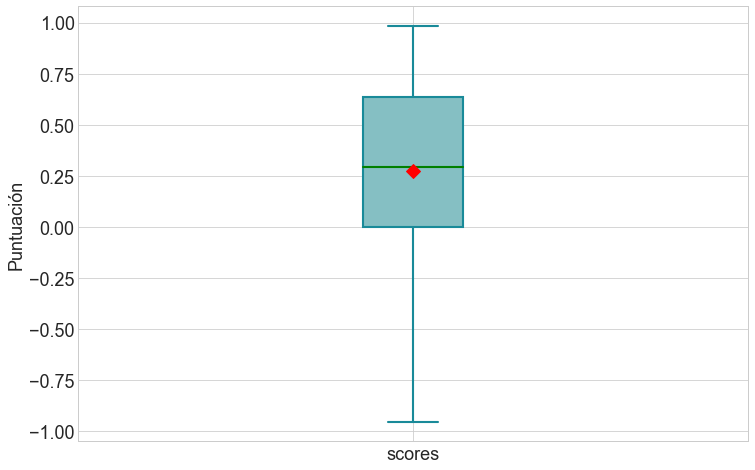

In [38]:
#Boxplot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
bp = df_model_sent.boxplot(column='scores', ax=ax, showmeans=True, showfliers=False, patch_artist=True, return_type='dict')
color_caja = '#85BFC3'  
color_bigote = '#198A99'   
grosor_linea = 2.1
ax.grid(True)  # Mostrar la cuadrícula
ax.set_ylabel('Puntuación', fontsize=18)
ax.set_xlabel('', fontsize=20)
ax.tick_params(labelsize=18)  # Ajusta el tamaño aquí

# Cambiar el color y el grosor de las cajas
for box in bp['boxes']:
    box.set(edgecolor=color_bigote, facecolor=color_caja , linewidth=grosor_linea)

# Cambiar el color y el grosor de los bigotes
for whisker in bp['whiskers']:
    whisker.set(color=color_bigote, linewidth=grosor_linea)

# Cambiar el color y el grosor de los extremos de los bigotes (caps)
for cap in bp['caps']:
    cap.set(color=color_bigote, linewidth=grosor_linea)

# Cambiar el color y el grosor de las líneas de las medianas
for median in bp['medians']:
    median.set(color='green', linewidth=grosor_linea)

# Personalizar la apariencia de los puntos de la media
for mean in bp['means']:
    mean.set(marker='D', markeredgecolor='red', markerfacecolor='red', markersize=10)

# Ocultar fliers (puntos aislados)
for flier in bp['fliers']:
    flier.set(marker='o', color=color_caja, alpha=0.5)
plt.savefig('C:/Users/Alejandra Bandeira/Downloads/boxplot_alta_resolucion2.png', dpi=300)
plt.show()

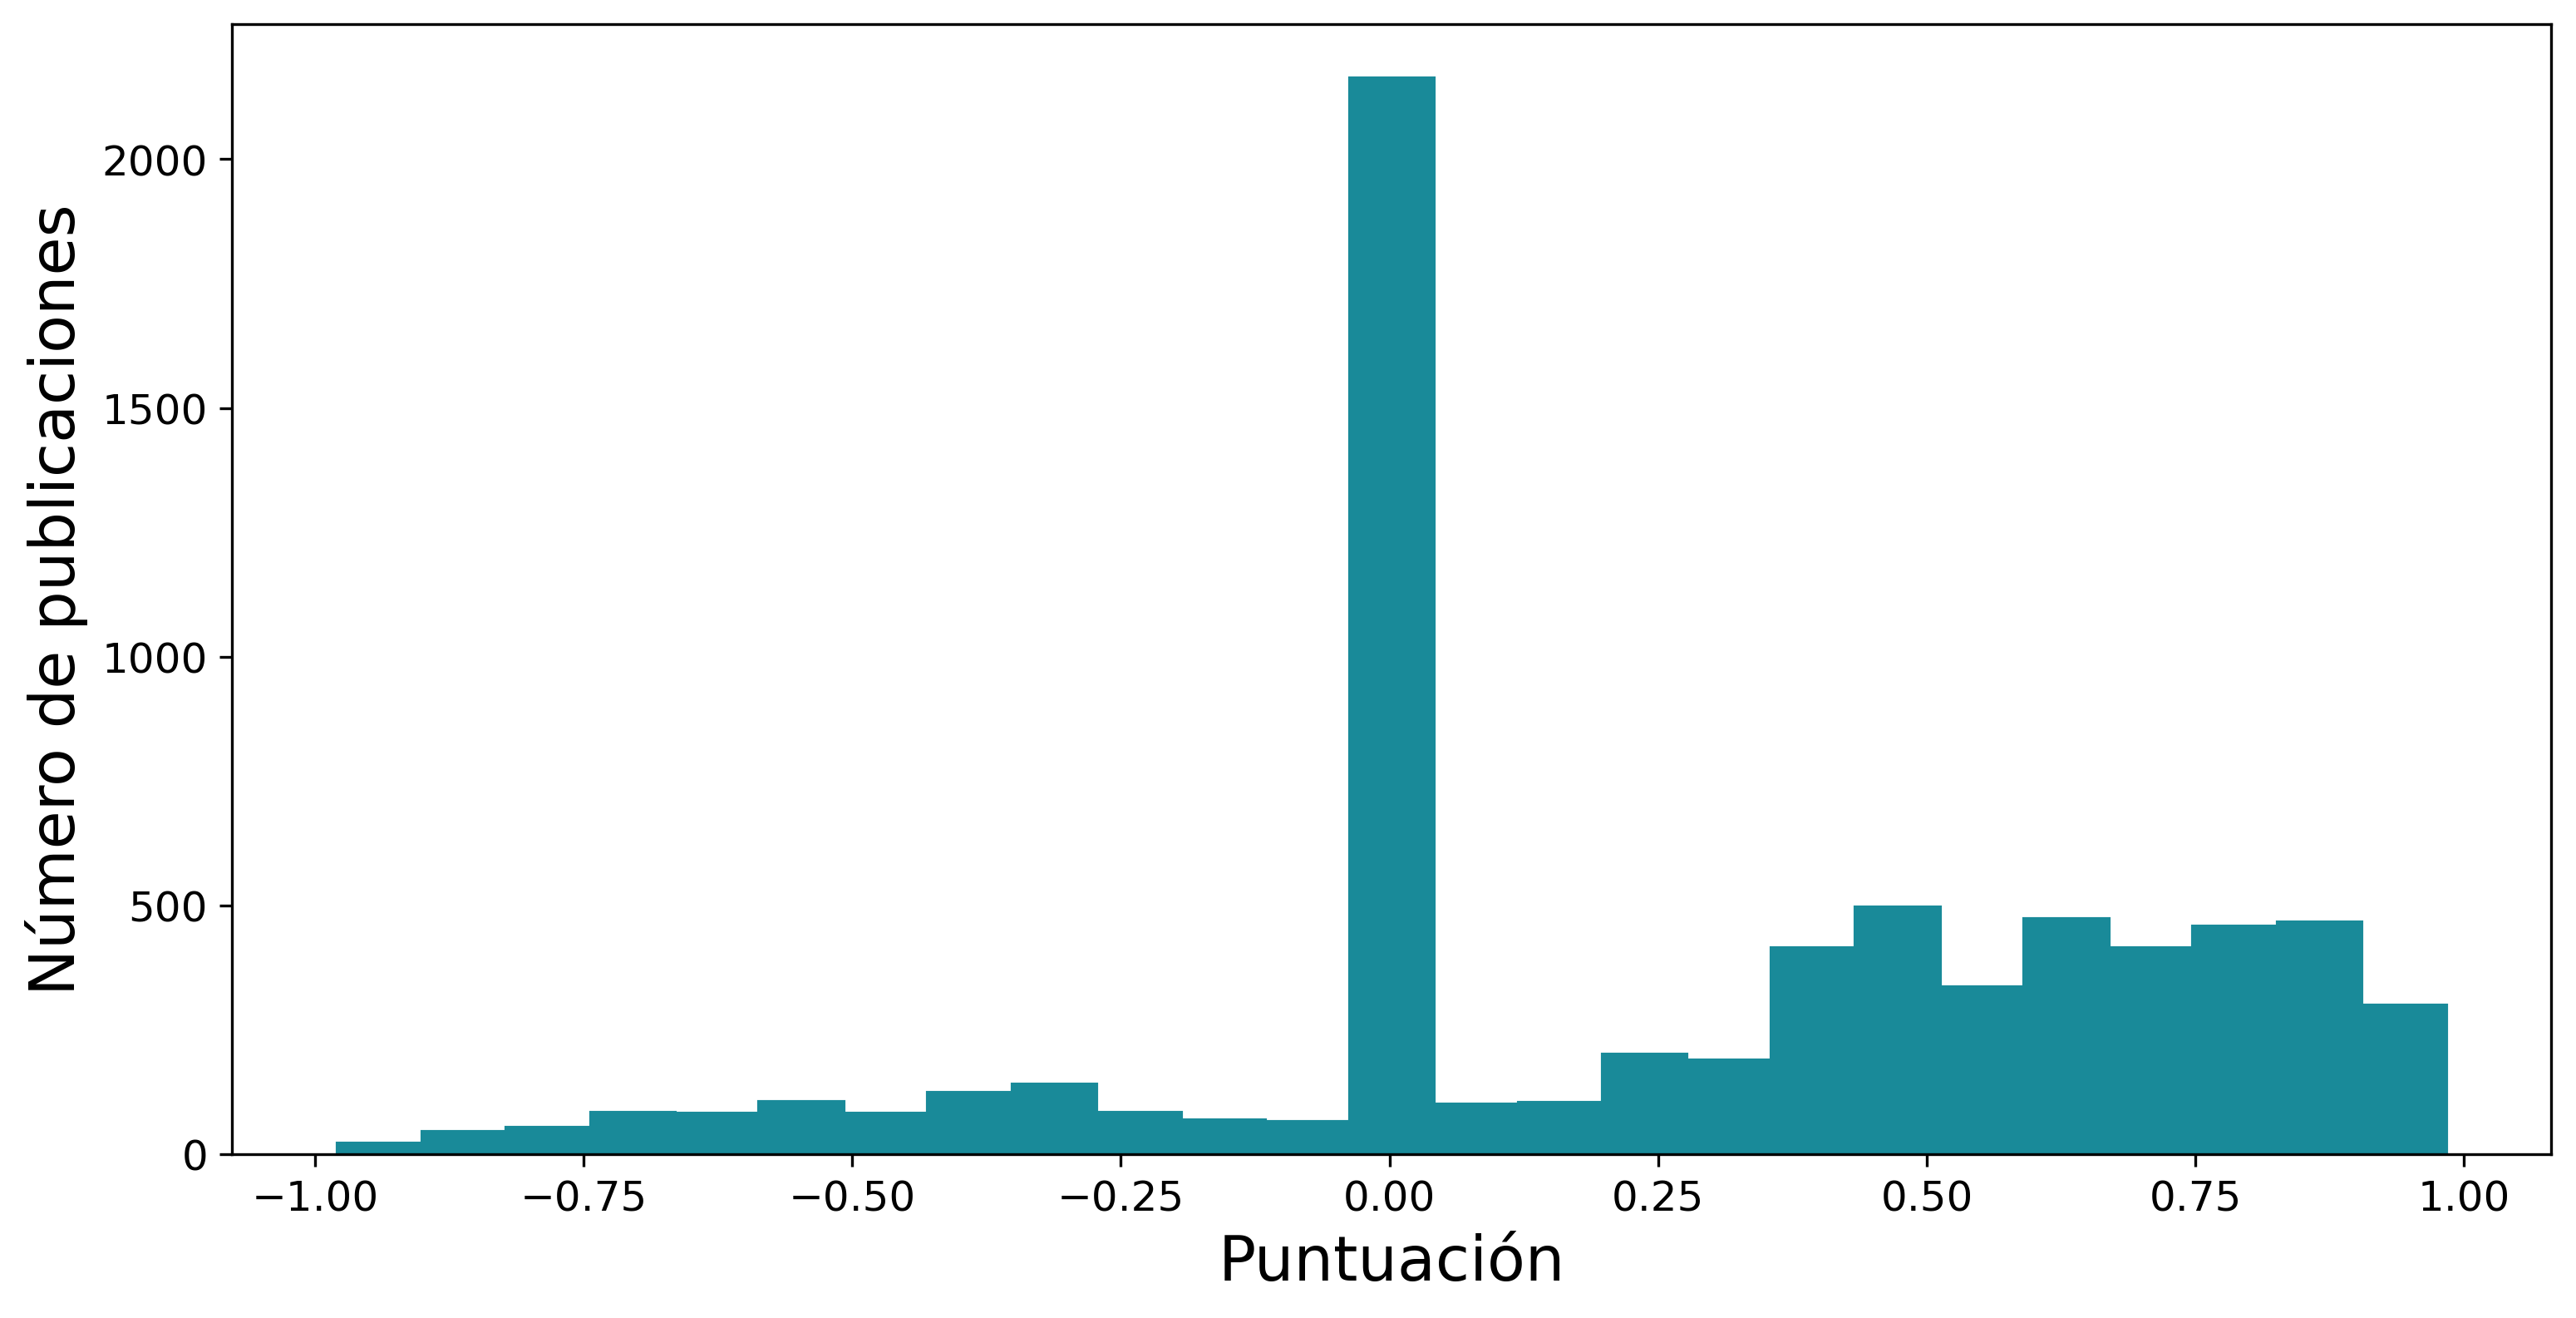

In [24]:
plt.figure(figsize=(12, 6), dpi=300)  # Aumenta el dpi para mejorar la resolución
plt.hist(df_model_sent['scores'], bins=25, color='#198A99', edgecolor='#198A99')
plt.xlabel('Puntuación', fontsize=18)
plt.ylabel('Número de publicaciones ', fontsize=18)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('C:/Users/Alejandra Bandeira/Downloads/histograma_alta_resolucion3.png', dpi=300)
plt.show()

In [67]:
#Agrupamos por fecha y sumamos las scores y hacemos un recuento de publicaciones
df_bygroup = pd.DataFrame(
    df_model_sent.groupby('Date')['scores']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'scores', 'count': 'number_of_entries'}))
df_bygroup = df_bygroup.reset_index()

In [68]:
df_bygroup

,index,Date,scores,number_of_entries
0,0,2019-03-18,17.6557,87
1,1,2019-03-19,36.6972,137
2,2,2019-03-20,47.4716,138
3,3,2019-03-21,36.2119,139
4,4,2019-03-22,41.3656,139
5,5,2019-03-23,29.9858,98
6,6,2019-03-24,37.1512,115
7,7,2019-03-25,43.8185,146
8,8,2019-03-26,40.4492,165
9,9,2019-03-27,36.4061,175


In [50]:
df_bygroup.to_csv("C:/Users/Alejandra Bandeira/Downloads/Sentiment_fecha3.csv", index=False) #Hacer grafica en flourish

In [67]:
#Para cada topico, cual es el socre que hay a lo largo del teimpo
df_bygroup2 = pd.DataFrame(
    df_model_sent.groupby(['Date','topic_dominant'])['scores']
    .agg(['sum'])
    .reset_index()
    .rename(columns={'sum': 'scores', 'count': 'number_of_entries'})
)

In [70]:
df_bygroup2.to_csv("C:/Users/Alejandra Bandeira/Downloads/topic_TODOS1.csv", index=False)

In [54]:
#Agrupo por topico y fecha y obtengo el score acumulado
#Topico 1
filtered_df = df_model_sent[df_model_sent['topic_dominant'] ==0]

# Agrupar el DataFrame filtrado por 'Date' y calcular sumas y conteos de 'scores'
df_bygroup_topic1 = pd.DataFrame(
    filtered_df.groupby('Date')['scores']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'total_scores', 'count': 'number_of_entries'})
)

In [56]:
df_bygroup_topic1.to_csv("C:/Users/Alejandra Bandeira/Downloads/Sentiment_topic1.csv", index=False)

In [57]:
#Topico 2
filtered_df = df_model_sent[df_model_sent['topic_dominant'] ==1]

# Agrupar el DataFrame filtrado por 'Date' y calcular sumas y conteos de 'scores'
df_bygroup_topic2 = pd.DataFrame(
    filtered_df.groupby('Date')['scores']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'total_scores', 'count': 'number_of_entries'})
)

In [58]:
df_bygroup_topic2.to_csv("C:/Users/Alejandra Bandeira/Downloads/Sentiment_topic2.csv", index=False)

In [59]:
#Topico 3
filtered_df = df_model_sent[df_model_sent['topic_dominant'] ==2]

# Agrupar el DataFrame filtrado por 'Date' y calcular sumas y conteos de 'scores'
df_bygroup_topic3 = pd.DataFrame(
    filtered_df.groupby('Date')['scores']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'total_scores', 'count': 'number_of_entries'})
)

In [60]:
df_bygroup_topic3.to_csv("C:/Users/Alejandra Bandeira/Downloads/Sentiment_topic3.csv", index=False)

In [61]:
#Topico 4
filtered_df = df_model_sent[df_model_sent['topic_dominant'] ==3]

# Agrupar el DataFrame filtrado por 'Date' y calcular sumas y conteos de 'scores'
df_bygroup_topic4 = pd.DataFrame(
    filtered_df.groupby('Date')['scores']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'total_scores', 'count': 'number_of_entries'})
)

In [62]:
df_bygroup_topic4.to_csv("C:/Users/Alejandra Bandeira/Downloads/Sentiment_topic4.csv", index=False)

In [63]:
#Topico 5
filtered_df = df_model_sent[df_model_sent['topic_dominant'] ==4]

# Agrupar el DataFrame filtrado por 'Date' y calcular sumas y conteos de 'scores'
df_bygroup_topic5 = pd.DataFrame(
    filtered_df.groupby('Date')['scores']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'total_scores', 'count': 'number_of_entries'})
)

In [64]:
df_bygroup_topic5.to_csv("C:/Users/Alejandra Bandeira/Downloads/Sentiment_topic5.csv", index=False)